# Quadratic Integrate-and-Fire (QIF) Model

The Quadratic Integrate-and-Fire (QIF) model is an extension of the standard Integrate-and-Fire model that incorporates a quadratic nonlinearity in the voltage equation. This nonlinearity better captures the spike initiation dynamics observed in real neurons, particularly the sharp acceleration of membrane potential near threshold. The QIF model can reproduce type I neural excitability, where neurons can fire at arbitrarily low frequencies, and exhibits a continuous transition from resting to firing states.

## Key Properties

1. **Quadratic Nonlinearity**: Uses a quadratic term (V - Vrest)² in the voltage equation
2. **Type I Excitability**: Can fire at arbitrarily low frequencies when input current approaches threshold
3. **Saddle-Node Bifurcation**: Exhibits a specific type of dynamical transition to firing
4. **Frequency-Current Relationship**: Firing rate increases as square root of input current beyond threshold
5. **No Linearization**: Better captures nonlinear dynamics near threshold than linear IF models

## Mathematical Description

The model is described by the following differential equation:

C(dV/dt) = a(V - Vrest)² + I

When V ≥ Vth:
  • V is reset to Vreset

Parameters:
- V: Membrane potential
- C: Membrane capacitance (typically 1 μF/cm²)
- a: Quadratic coefficient that determines the curvature of V²-nullcline (typically 0.04 mS/cm²·mV)
- Vrest: Resting potential (typically -70 mV)
- Vth: Spike threshold (typically -50 to -55 mV)
- Vreset: Reset potential after spike (typically -70 mV)
- I: External current input

State Variables:
- V: Membrane potential (initialize at Vreset)

Time-related variables:
- dt: Time step for numerical integration
- t: Current simulation time
- tmax: Maximum simulation time

## Algorithm

1. Initialize state variables
   - V = Vreset
   - Create empty list for spike times

2. For each time step from t=0 to t=tmax:
   
   a. Check if spike threshold is reached
      - If V ≥ Vth:
        • Record spike time
        • Reset membrane potential: V = Vreset
   
   b. Compute derivative term
      - dV/dt = (a(V - Vrest)² + I) / C
   
   c. Update membrane potential using Euler method
      - V = V + dV/dt * dt
   
   d. Store variables for plotting
      - Record V at current time step
   
   e. Increment time: t = t + dt

3. Analyze and visualize results
   - Plot membrane potential (V) vs time
   - Calculate firing rate and other statistics

## Characteristic Behaviors

1. **Class I Excitability**: Can fire at arbitrarily low frequencies as input current approaches threshold
2. **Square Root Scaling**: Firing frequency increases as the square root of the input current above threshold
3. **No Subthreshold Oscillations**: Does not produce oscillations below threshold
4. **Smooth Spike Initiation**: More gradual acceleration toward threshold compared to standard IF models
5. **Integrator Properties**: Acts as an integrator of inputs rather than a resonator

## Biological Mechanisms Represented

The quadratic term represents:
- Fast positive feedback from Na+ channel activation during spike initiation
- The nonlinear relationship between voltage and activation of voltage-gated channels
- The dynamics of the spike generating mechanism near threshold

Unlike more complex models (e.g., Hodgkin-Huxley), the QIF does not explicitly model:
- Specific ion channel kinetics
- Refractory mechanisms (except through reset)
- Adaptation or bursting (without extensions)

## Applications

The QIF model is particularly useful for modeling:
- Cortical neurons with type I excitability
- Large-scale neural networks where computational efficiency is important
- Neural systems where the qualitative dynamics near threshold are important
- Situations where a simple but non-linear neural model is needed
- Theoretical studies of neural coding and computation

The QIF model serves as the basis for more complex models like the Theta model and forms a bridge between simple linear IF models and more biologically detailed conductance-based models.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class QIF():
    def __init__(self, C, a, V_th, V_reset, V_rest, I, time_steps):
        self.C = C        # Membrane capacitance
        self.a = a        # Quadratic coefficient
        self.V_th = V_th  # Threshold voltage
        self.V_reset = V_reset  # Reset voltage
        self.V_rest = V_rest  # Resting voltage
        self.I = I        # Input current
        
        self.time_steps = time_steps

    def qif(self):
        # Initialize arrays for storing voltage and spike times
        voltage = [self.V_reset]  # Start at reset voltage
        spikes = []
        dt = self.time_steps[1] - self.time_steps[0]  # Time step size
        
        # Simulate for each time step
        for t_idx, t in enumerate(self.time_steps[:-1]):
            # Current voltage
            V_current = voltage[-1]
            
            # QIF differential equation: dV/dt = (a*(V-V_rest)² + I)/C
            dV_dt = (self.a * (V_current - self.V_rest)**2 + self.I) / self.C
            V_next = V_current + dV_dt * dt
            
            # Check for spike
            if V_next >= self.V_th:
                spikes.append(t + dt)
                V_next = self.V_reset
            
            voltage.append(V_next)
        
        return voltage, spikes
    
    def plot_results(self, voltage, spikes):
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(10, 6))
        plt.plot(self.time_steps, voltage)
        
        # Plot horizontal lines for threshold and reset voltage
        plt.axhline(y=self.V_th, color='r', linestyle='--', alpha=0.7, label='Threshold')
        plt.axhline(y=self.V_reset, color='g', linestyle='--', alpha=0.7, label='Reset')
        
        # Plot spikes as vertical lines
        for spike in spikes:
            plt.axvline(x=spike, color='r', linestyle='-', alpha=0.5)
        
        plt.xlabel('Time (ms)')
        plt.ylabel('Membrane Potential (mV)')
        plt.title('Quadratic Integrate-and-Fire Neuron')
        plt.legend()
        plt.grid(True)
        plt.show()

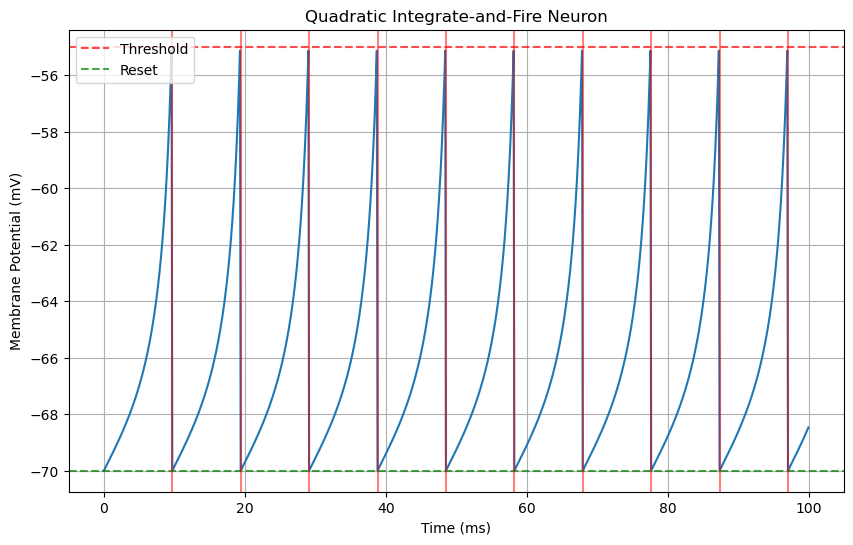

In [6]:
# Example usage of the QIF model
t_max = 100  # ms
dt = 0.1  # ms
time_steps = np.arange(0, t_max, dt)

qif_neuron = QIF(
    C=1,            # nF
    a=0.04,         # Parameter that controls the strength of the quadratic term
    V_th=-55,       # mV
    V_reset=-70,    # mV
    V_rest=-70,     # mV
    I=0.5,          # nA
    time_steps=time_steps
)

# Run simulation
voltage, spikes = qif_neuron.qif()

# Plot results
qif_neuron.plot_results(voltage, spikes)